In [71]:
# libraries 
import numpy as np
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from statsmodels.stats.anova import anova_lm
from scipy import stats
import statsmodels
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.feature_selection import SequentialFeatureSelector
from steps.forward import ForwardSelector
from steps.subset import SubsetSelector

In [72]:
# data
df = pd.read_csv('monthly.csv')
pd.set_option('display.max_columns', None)
df = df.dropna()
df.head(5)

,Month,cpiyoy,cpiyoy1,cpiyoy2,govt_string,vaxfull,dvaxfull,dcovid,total_covid,new_cases,new_cases pm,new_deaths,new_deathspm,cci,cci1,cci2,cci3,cci4,cci5,cci6,cci7,cci8,cci_exp,cci_cur,ism_man,ism_non,ism_man_backlog,ism_non_backlog,ism_man_prices,ism_non_prices,ism_man_non_neworders,ism_non_neworders,ism_man_prod,ism_man_employ,ism_non_employ,ism_man_inv,dbear,debtceiling2011,dgulfwar1,dgulfwar2,dshut,dstock87,vaxdec2020
366,1997M07,2.2,2.2,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.3,129.9,127.9,118.5,118.5,118.9,118.7,114.2,109.5,107.6,154.5,57.7,56.7,56.5,51.0,52.0,50.9,61.3,58.8,64.5,51.7,53.8,45.9,0.0,0.0,0.0,0.0,0.0,0.0,0
367,1997M08,2.3,2.2,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.6,126.3,129.9,127.9,118.5,118.5,118.9,118.7,114.2,108.7,156.1,56.3,62.0,60.0,49.0,52.1,53.3,60.3,60.2,61.5,51.3,53.8,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0
368,1997M09,2.2,2.3,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.2,127.6,126.3,129.9,127.9,118.5,118.5,118.9,118.7,111.9,157.6,53.9,56.2,50.0,56.5,53.0,53.1,55.4,59.3,56.6,51.2,53.2,47.2,0.0,0.0,0.0,0.0,0.0,0.0,0
369,1997M10,2.1,2.2,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.4,130.2,127.6,126.3,129.9,127.9,118.5,118.5,118.9,107.3,147.5,56.4,56.6,56.5,49.5,53.6,53.1,60.9,60.8,59.4,52.8,51.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0
370,1997M11,1.9,2.1,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.1,123.4,130.2,127.6,126.3,129.9,127.9,118.5,118.5,108.9,156.8,55.7,58.5,50.0,52.0,52.1,54.3,57.4,59.9,60.1,53.7,56.7,43.8,0.0,0.0,0.0,0.0,0.0,0.0,0


Pull max historical data for cci = cpi + gdp + unemployment + ism_man + ism_non + stock returns + covid dummy

In [73]:
df.shape[0]

303

In [44]:
df.dtypes

Month                    object
cpiyoy                   object
cpiyoy1                  object
cpiyoy2                  object
govt_string              object
vaxfull                  object
dcovid                   object
total_covid              object
new_cases                object
new_cases pm             object
new_deaths               object
new_deathspm             object
cci                      object
cci1                     object
cci2                     object
cci3                     object
cci4                     object
cci5                     object
cci6                     object
cci7                     object
cci8                     object
cci_exp                  object
cci_cur                  object
ism_man                  object
ism_non                  object
ism_man_backlog          object
ism_non_backlog          object
ism_man_prices           object
ism_non_prices           object
ism_man_non_neworders    object
ism_non_neworders        object
ism_man_

In [27]:
import pandas_datareader as pdr
import datetime

In [245]:
# start = datetime.datetime(1900,1,1)
# end = datetime.datetime.today()

#df = pdr.DataReader('CPILEGSL', 'fred', start, end)
#df1 = pdr.DataReader('NA000334Q', 'fred', start, end)
#df2 = pdr.DataReader('UNRATENSA', 'fred', start, end)
# df3 = pdr.DataReader('SP500', 'fred', start, end)

In [246]:
# df5 = pd.concat([df,df1,df2,df3], axis=1)

In [247]:
# test = df5.to_csv('dind.csv', encoding='utf-8')

--------------------------------------------------------------------------------

In [140]:
# pf = pd.read_csv('dind.csv', encoding='utf-8')

In [92]:
import pandas_datareader as pdr
import datetime as dt

ticker = "^GSPC"
start = dt.datetime(1900, 1, 1)
end = dt.datetime(2022, 11, 19)
 
data = pdr.get_data_yahoo(ticker, start, end)
print(data)

                   High          Low         Open        Close      Volume  \
Date                                                                         
1927-12-30    17.660000    17.660000    17.660000    17.660000           0   
1928-01-03    17.760000    17.760000    17.760000    17.760000           0   
1928-01-04    17.719999    17.719999    17.719999    17.719999           0   
1928-01-05    17.549999    17.549999    17.549999    17.549999           0   
1928-01-06    17.660000    17.660000    17.660000    17.660000           0   
...                 ...          ...          ...          ...         ...   
2022-11-14  4008.969971  3956.399902  3977.969971  3957.250000  4561930000   
2022-11-15  4028.840088  3953.169922  4006.409912  3991.729980  5015310000   
2022-11-16  3983.090088  3954.340088  3976.820068  3958.790039  4165320000   
2022-11-17  3954.330078  3906.540039  3919.260010  3946.560059  4051780000   
2022-11-18  3979.889893  3948.449951  3966.389893  3958.870117  

In [142]:
# df = data.to_csv('sp500.csv', encoding='utf-8')

--------------------------------------------------------------------------------

In [5]:

###############################################################################
# https://github.com/chris-santiago/steps 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
np.set_printoptions(suppress=True)

In [53]:
# data
df = pd.read_csv('cur_us_owid_covid_monthly.csv')
pd.set_option('display.max_columns', None)
df = df.dropna()
df.shape[0]

300

In [235]:
# headers
for pred in df.columns:
    print(pred)

date
total_cases
new_cases
total_deaths
new_deaths
positive_rate
stringency_index
cci
VaxFull
cpi
u
sp500
dcovid
ism_man
ism_non
ism_man_back
ism_nonman_back
ism_man_prices
ism_nonman_prices
ism_man_new_ord
ism_nonman_new_ord
ism_man_prod
ism_manu_emp
ism_nonman_empl
iam_man_inv
dbear
debtceiling2011
dgulfwar1
dgulfwar2
dshut
dstock87
mich_over
mich_sent_exp
mich_sent_cur
sqtotal_cases
sqnew_cases
sqtotal_deaths
sqnew_deaths
sqpositive_rate
sqstringency_index
sqvaxfull
cci_total_cases
cci_total_new_cases
cci_total_deaths
cci_new_deaths
cci_positive_rate
cci_stringency_index
cci_vaxfull
cci_cpi
cci_u
cci_sp500
cci_ism_man
cci_ism_non
cci_dbear
cci_debtceiling2011
cci_dgulfwar1
cci_dgulfwar2
cci_dshut
cci_dstock87
cci_sqtotal_cases
cci_sqnew_cases
cci_sqtotal_deaths
cci_sqnew_deaths
cci_sqpositive_rate
cci_sqstringency_index
cci_sqvaxfull
cci_lag6
cci_lag7
cci6_total_cases
cci6_total_new_cases
cci6_total_deaths
cci6_new_deaths
cci6_positive_rate
cci6_stringency_index
cci6_vaxfull
cci6_cp

In [17]:
# df.dtypes

"Search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d. The motivation behind feature selection algorithms is to automatically select a subset of features most relevant to the problem. The goal of feature selection is two-fold: We want to improve the computational efficiency and reduce the model's generalization error by removing irrelevant features or noise. In addition, a wrapper approach such as sequential feature selection is advantageous if embedded feature selection -- for example, a regularization penalty like LASSO -- is not applicable.

In a nutshell, SFAs remove or add one feature at a time based on the classifier performance until a feature subset of the desired size k is reached."
http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

In [4]:
# best subset selection -- forward
y=df['cci']
x=df[[']]
model=LinearRegression()
sfs=SequentialFeatureSelector(model,direction='forward')
sfs.fit(x,y)
sfs.get_feature_names_out()

array(['new_deaths', 'new_cases'], dtype=object)

"This searching algorithm adds or removes the feature candidate from the candidate subset while evaluating the objective function or criterion. Sequential searches follow only one direction: either it increases the number of features in the subset or reduces the number of features in the candidate feature subset."
https://analyticsindiamag.com/a-complete-guide-to-sequential-feature-selection/

In [18]:
# RFE - recursive feature elimination
y=['cci']
x=df.drop([])
rfe = RFE(mo)             
rfe = rfe.fit(x5, y5)
#        Variable     Selected       Ranking
list(zip(x.columns, rfe.support_, rfe.ranking_))

TypeError: Cannot clone object '<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd584821a30>' (type <class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [45]:
# From forward selector
x2 = df[['new_deaths', 'positive_rate', 'stringency_index', 'VaxFull',
       'cpi', 'unem', 'dcovid', 'ism_man', 'ism_non',
       'ism_nonman_prices', 'ism_nonman_new_ord', 'ism_nonman_empl',
       'iam_man_inv', 'dbear', 'debtceiling2011', 'dgulfwar1',
       'dgulfwar2', 'dshut', 'dstock87', 'sqtotal_cases',
       'sqpositive_rate', 'sqstringency_index', 'sqvaxfull',
       'cci_total_deaths', 'cci_unem', 'cci_ism_man', 'cci_ism_non',
       'cci_dgulfwar1', 'cci_dshut', 'cci_dstock87', 'cci_sqtotal_deaths',
       'cci_sqnew_deaths', 'cci_sqstringency_index', 'cci_lag7',
       'cci_total_cases.1', 'cci7_stringency_index', 'cci7_unem',
       'cci7_sp500', 'cci7_ism_man', 'cci7_ism_non',
       'cci7_dgulfwar2', 'cci7_dshut',
       'cci7_sqnew_cases', 'cci7_sqpositive_rate',
       'cci7_sqstringency_index', 'cci7_sqvaxfull']]
x2 = sm.add_constant(x2)
y2 = df['cci']
       
# Build the model with RFE features
model2 = sm.OLS(y2,x2).fit()

#Summary of linear model
print(model2.summary2())

KeyError: "['positive_rate', 'stringency_index', 'VaxFull', 'cpi', 'unem', 'ism_nonman_prices', 'ism_nonman_new_ord', 'ism_nonman_empl', 'iam_man_inv', 'sqtotal_cases', 'sqpositive_rate', 'sqstringency_index', 'sqvaxfull', 'cci_total_deaths', 'cci_unem', 'cci_ism_man', 'cci_ism_non', 'cci_dgulfwar1', 'cci_dshut', 'cci_dstock87', 'cci_sqtotal_deaths', 'cci_sqnew_deaths', 'cci_sqstringency_index', 'cci_lag7', 'cci_total_cases.1', 'cci7_stringency_index', 'cci7_unem', 'cci7_sp500', 'cci7_ism_man', 'cci7_ism_non', 'cci7_dgulfwar2', 'cci7_dshut', 'cci7_sqnew_cases', 'cci7_sqpositive_rate', 'cci7_sqstringency_index', 'cci7_sqvaxfull'] not in index"

In [99]:
x4 = df[['cci7', 'cpiyoy', 'dvaxfull', 'dbear', 'dgulfwar2', 
         'debtceiling2011', 'new_deaths', 'ism_man_employ', 'ism_non_employ']]
x4 = sm.add_constant(x4)
y4 = df['cci']
       
# Build the model with RFE features
model4 = sm.OLS(y4,x4.astype(float)).fit(cov_type='HC3')

#Summary of linear model
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cci   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     232.5
Date:                Sun, 20 Nov 2022   Prob (F-statistic):          8.37e-128
Time:                        18:15:06   Log-Likelihood:                -1115.4
No. Observations:                 303   AIC:                             2251.
Df Residuals:                     293   BIC:                             2288.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -68.8978      7.172     

In [74]:
x3 = df[['cci1', 'cci2', 'cci3', 'cci4', 'cci5', 'cci6', 'cci7', 'cpiyoy', 'cpiyoy1', 'dvaxfull', 'dbear', 'dgulfwar2', 'dcovid', 
         'debtceiling2011', 'new_deaths', 'ism_man_employ', 'ism_non_employ']]
x3 = sm.add_constant(x3)
y3 = df['cci']
       
# Build the model with RFE features
model3 = sm.OLS(y3,x3.astype(float)).fit()

#Summary of linear model
print(model3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.961    
Dependent Variable: cci              AIC:                1899.4469
Date:               2022-11-20 18:03 BIC:                1966.2941
No. Observations:   303              Log-Likelihood:     -931.72  
Df Model:           17               F-statistic:        443.9    
Df Residuals:       285              Prob (F-statistic): 8.55e-194
R-squared:          0.964            Scale:              29.176   
------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
const           -24.2601   4.0263 -6.0254 0.0000 -32.1852 -16.3350
cci1              0.7527   0.0551 13.6642 0.0000   0.6443   0.8612
cci2             -0.0571   0.0712 -0.8015 0.4235  -0.1972   0.0831
cci3              0.1165   0.0707  1.6479 0.1005  -0.0226   0.2557
cci4         

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


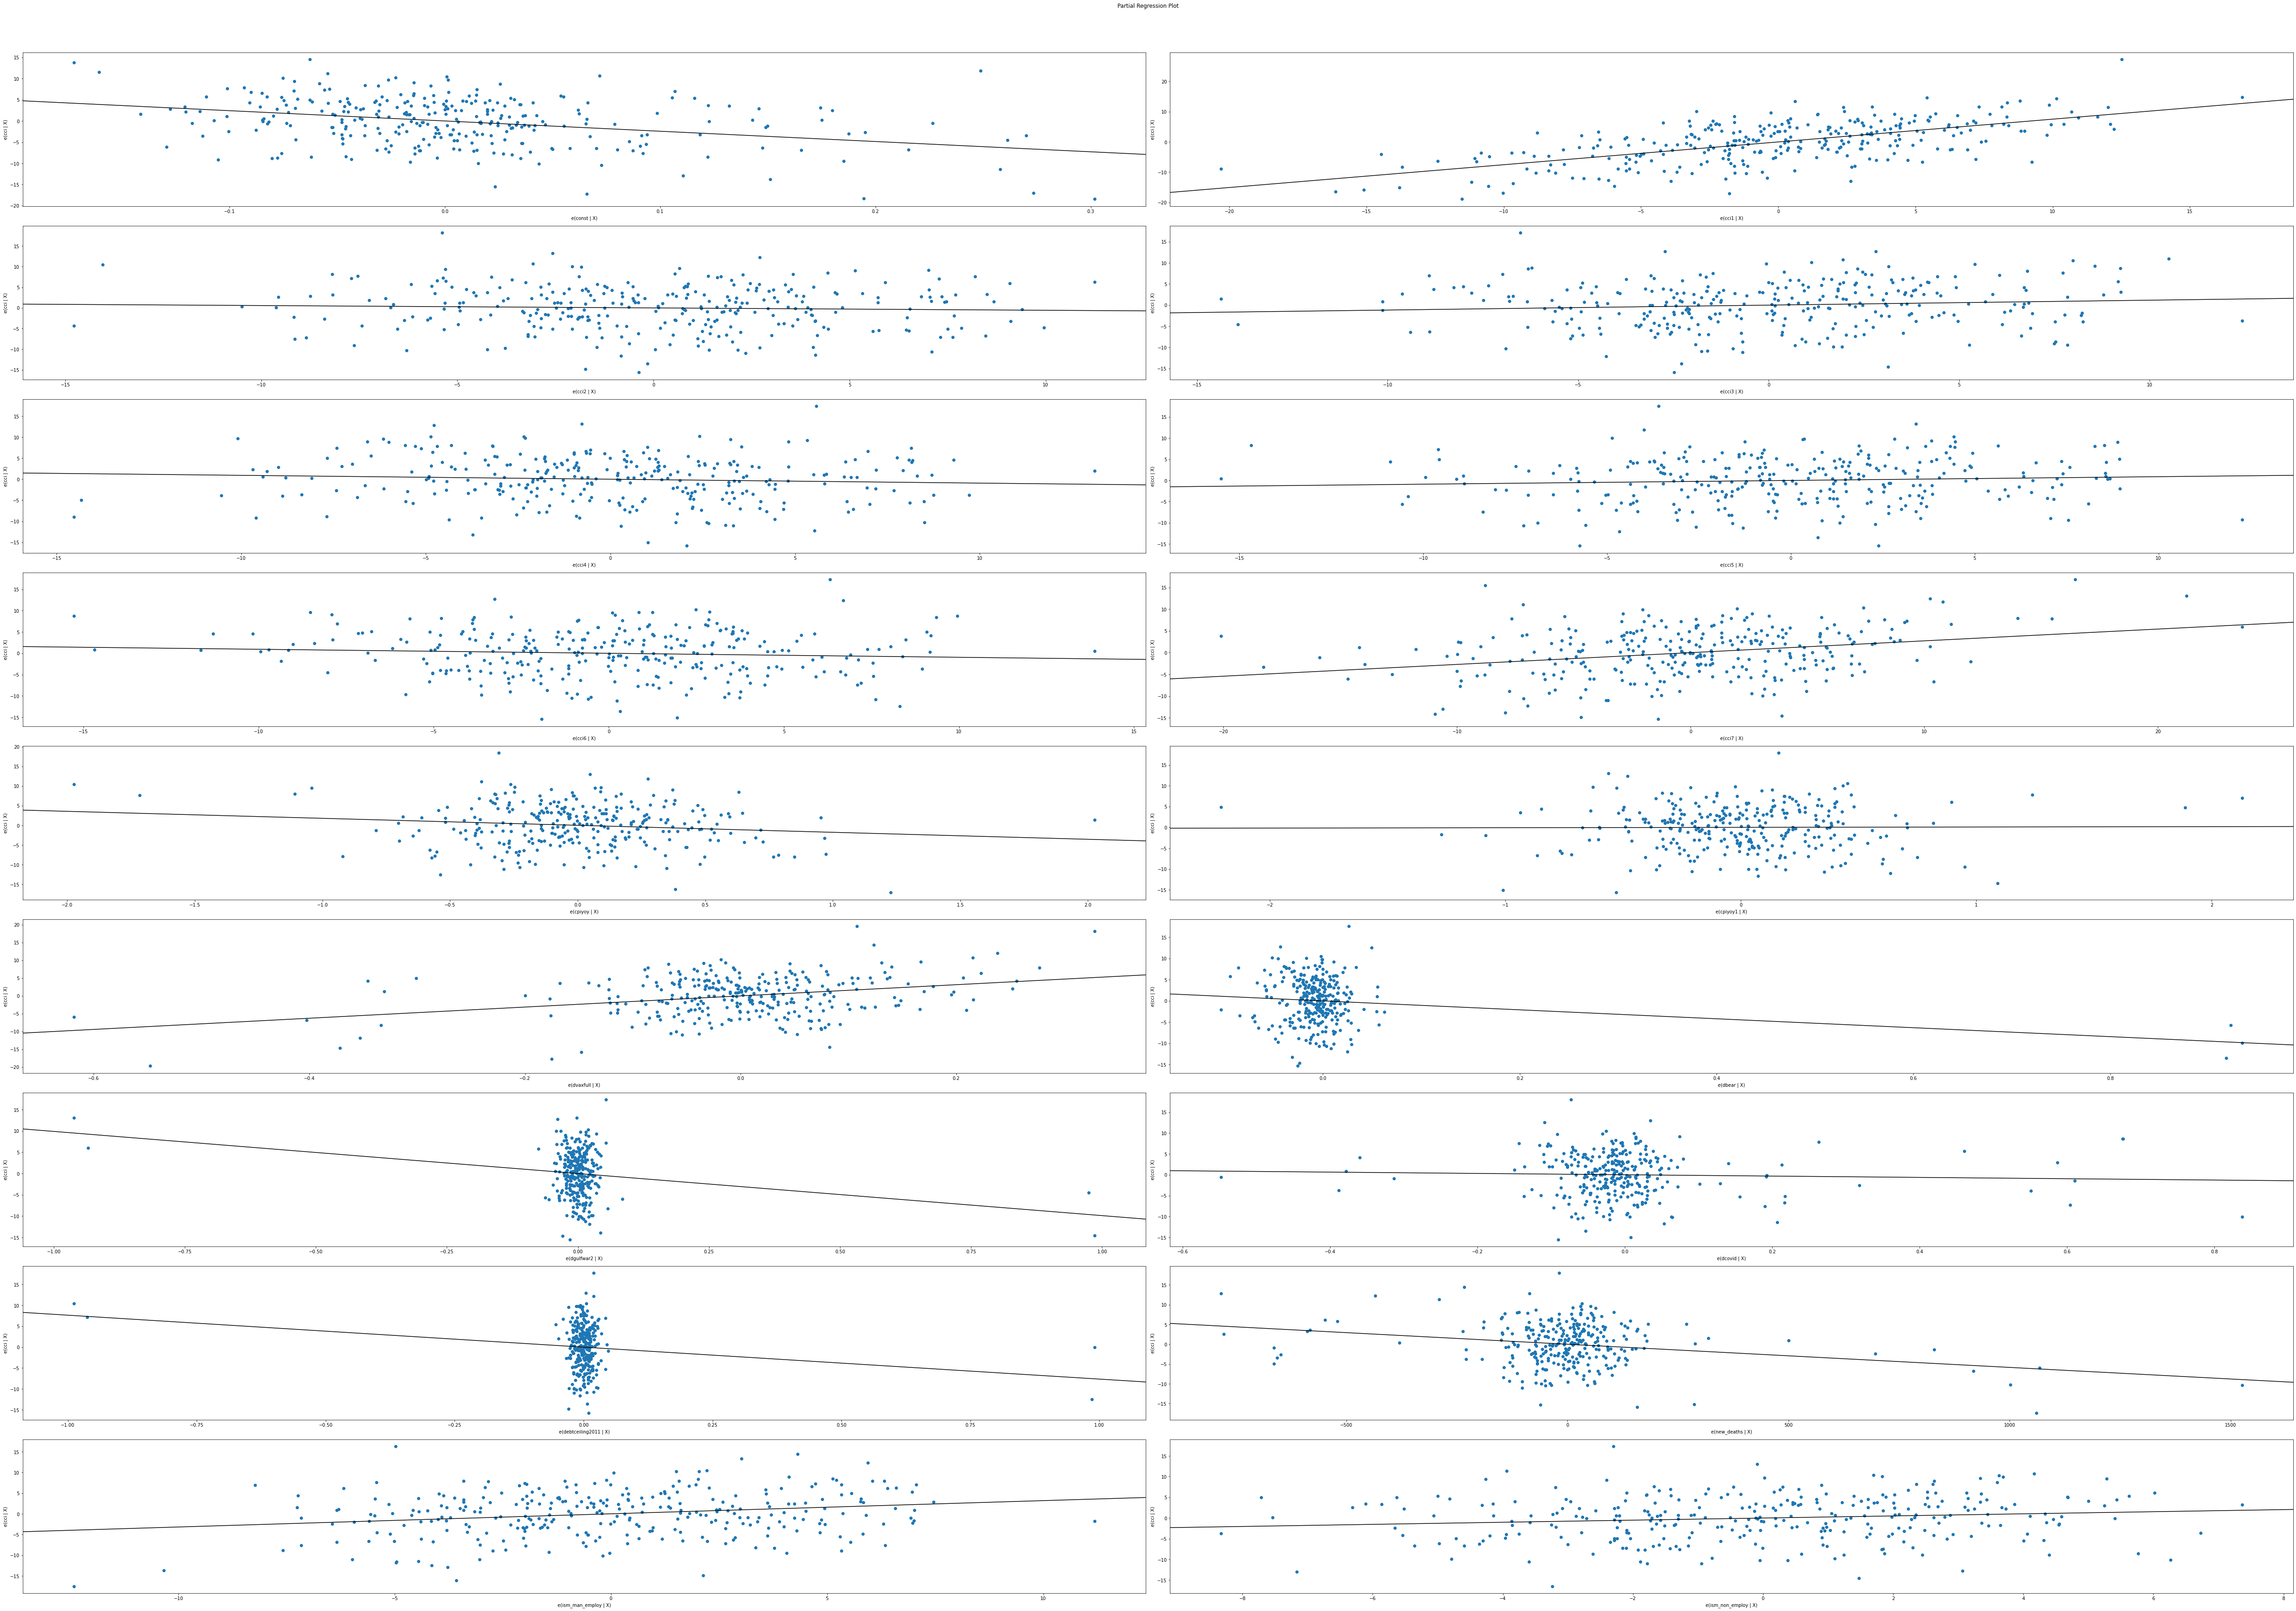

In [77]:
#define figure size
fig = plt.figure(figsize=(70,50))

#produce regression plots
# of y on one predictor variable with different graphs
# fig = sm.graphics.plot_regress_exog(mo, 'cci_lag1', fig=fig)
fig = sm.graphics.plot_partregress_grid(model3, fig=fig)
# fig.tight_layout(pad=1.0)

In [95]:
# RESET Test
reset5 = smd.linear_reset(res=model4, power=2, test_type='fitted', use_f=True)
print(reset5)

<F test: F=1.9912933600443137, p=0.1592702642610026, df_denom=292, df_num=1>


/Users/mauricefreese/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


In [79]:
sy = smf.ols('cci ~ total_cases + ism_non + dcovid:cci_lag7', df)
mo = sy.fit()
print(mo.summary2())

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.240    
Dependent Variable:  cci              AIC:                2668.9191
Date:                2022-11-16 23:43 BIC:                2683.6261
No. Observations:    292              Log-Likelihood:     -1330.5  
Df Model:            3                F-statistic:        31.65    
Df Residuals:        288              Prob (F-statistic): 1.03e-17 
R-squared:           0.248            Scale:              538.43   
-------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
-------------------------------------------------------------------
Intercept       -79.3942  19.0082 -4.1768 0.0000 -116.8068 -41.9816
total_cases      -0.0000   0.0000 -1.9272 0.0549   -0.0000   0.0000
ism_non           3.1871   0.3475  9.1716 0.0000    2.5032   3.8711
dcovid:cci_lag7   0.1192   0.0656  1.8154 0.0705   -0.0100   0.248

In [263]:
# headers
for pred in df.columns:
    print(pred)

date
total_cases
new_cases
total_deaths
new_deaths
positive_rate
stringency_index
cci
VaxFull
cpi
u
sp500
dcovid
ism_man
ism_non
ism_man_back
ism_nonman_back
ism_man_prices
ism_nonman_prices
ism_man_new_ord
ism_nonman_new_ord
ism_man_prod
ism_manu_emp
ism_nonman_empl
iam_man_inv
dbear
debtceiling2011
dgulfwar1
dgulfwar2
dshut
dstock87
mich_over
mich_sent_exp
mich_sent_cur
sqtotal_cases
sqnew_cases
sqtotal_deaths
sqnew_deaths
sqpositive_rate
sqstringency_index
sqvaxfull
cci_total_cases
cci_total_new_cases
cci_total_deaths
cci_new_deaths
cci_positive_rate
cci_stringency_index
cci_vaxfull
cci_cpi
cci_u
cci_sp500
cci_ism_man
cci_ism_non
cci_dbear
cci_debtceiling2011
cci_dgulfwar1
cci_dgulfwar2
cci_dshut
cci_dstock87
cci_sqtotal_cases
cci_sqnew_cases
cci_sqtotal_deaths
cci_sqnew_deaths
cci_sqpositive_rate
cci_sqstringency_index
cci_sqvaxfull
cci_lag6
cci_lag7
cci6_total_cases
cci6_total_new_cases
cci6_total_deaths
cci6_new_deaths
cci6_positive_rate
cci6_stringency_index
cci6_vaxfull
cci6_cp

Note similiar effect in total_cases and total_deaths being relatively the same and how much more significant ism_non is

In [17]:
# looking at lags to use
sy = smf.ols('cci ~ dcovid + cci_lag6 + dbear + stringency_index +ism_non_new_ord', df)
mo = sy.fit()
print(mo.summary2())

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.755    
Dependent Variable:  cci              AIC:                2374.7978
Date:                2022-11-18 10:36 BIC:                2396.9399
No. Observations:    296              Log-Likelihood:     -1181.4  
Df Model:            5                F-statistic:        182.5    
Df Residuals:        290              Prob (F-statistic): 2.39e-87 
R-squared:           0.759            Scale:              175.04   
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept         -0.7613   8.6114 -0.0884 0.9296 -17.7101  16.1876
dcovid            -6.4623   8.6914 -0.7435 0.4578 -23.5684  10.6439
cci_lag6           0.7916   0.0319 24.8435 0.0000   0.7288   0.8543
dbear            -27.9056   7.8024 -3.5765 0.0004 -43.2622 -12.549

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x4.columns
vif['VIF'] = [variance_inflation_factor(x4.values, i) for i in range(x4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,126.36
3,dvaxfull,3.72
9,ism_non_employ,2.57
8,ism_man_employ,2.54
7,new_deaths,2.51
2,cpiyoy,2.15
1,cci7,1.52
4,dbear,1.03
5,dgulfwar2,1.00
6,debtceiling2011,1.00


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


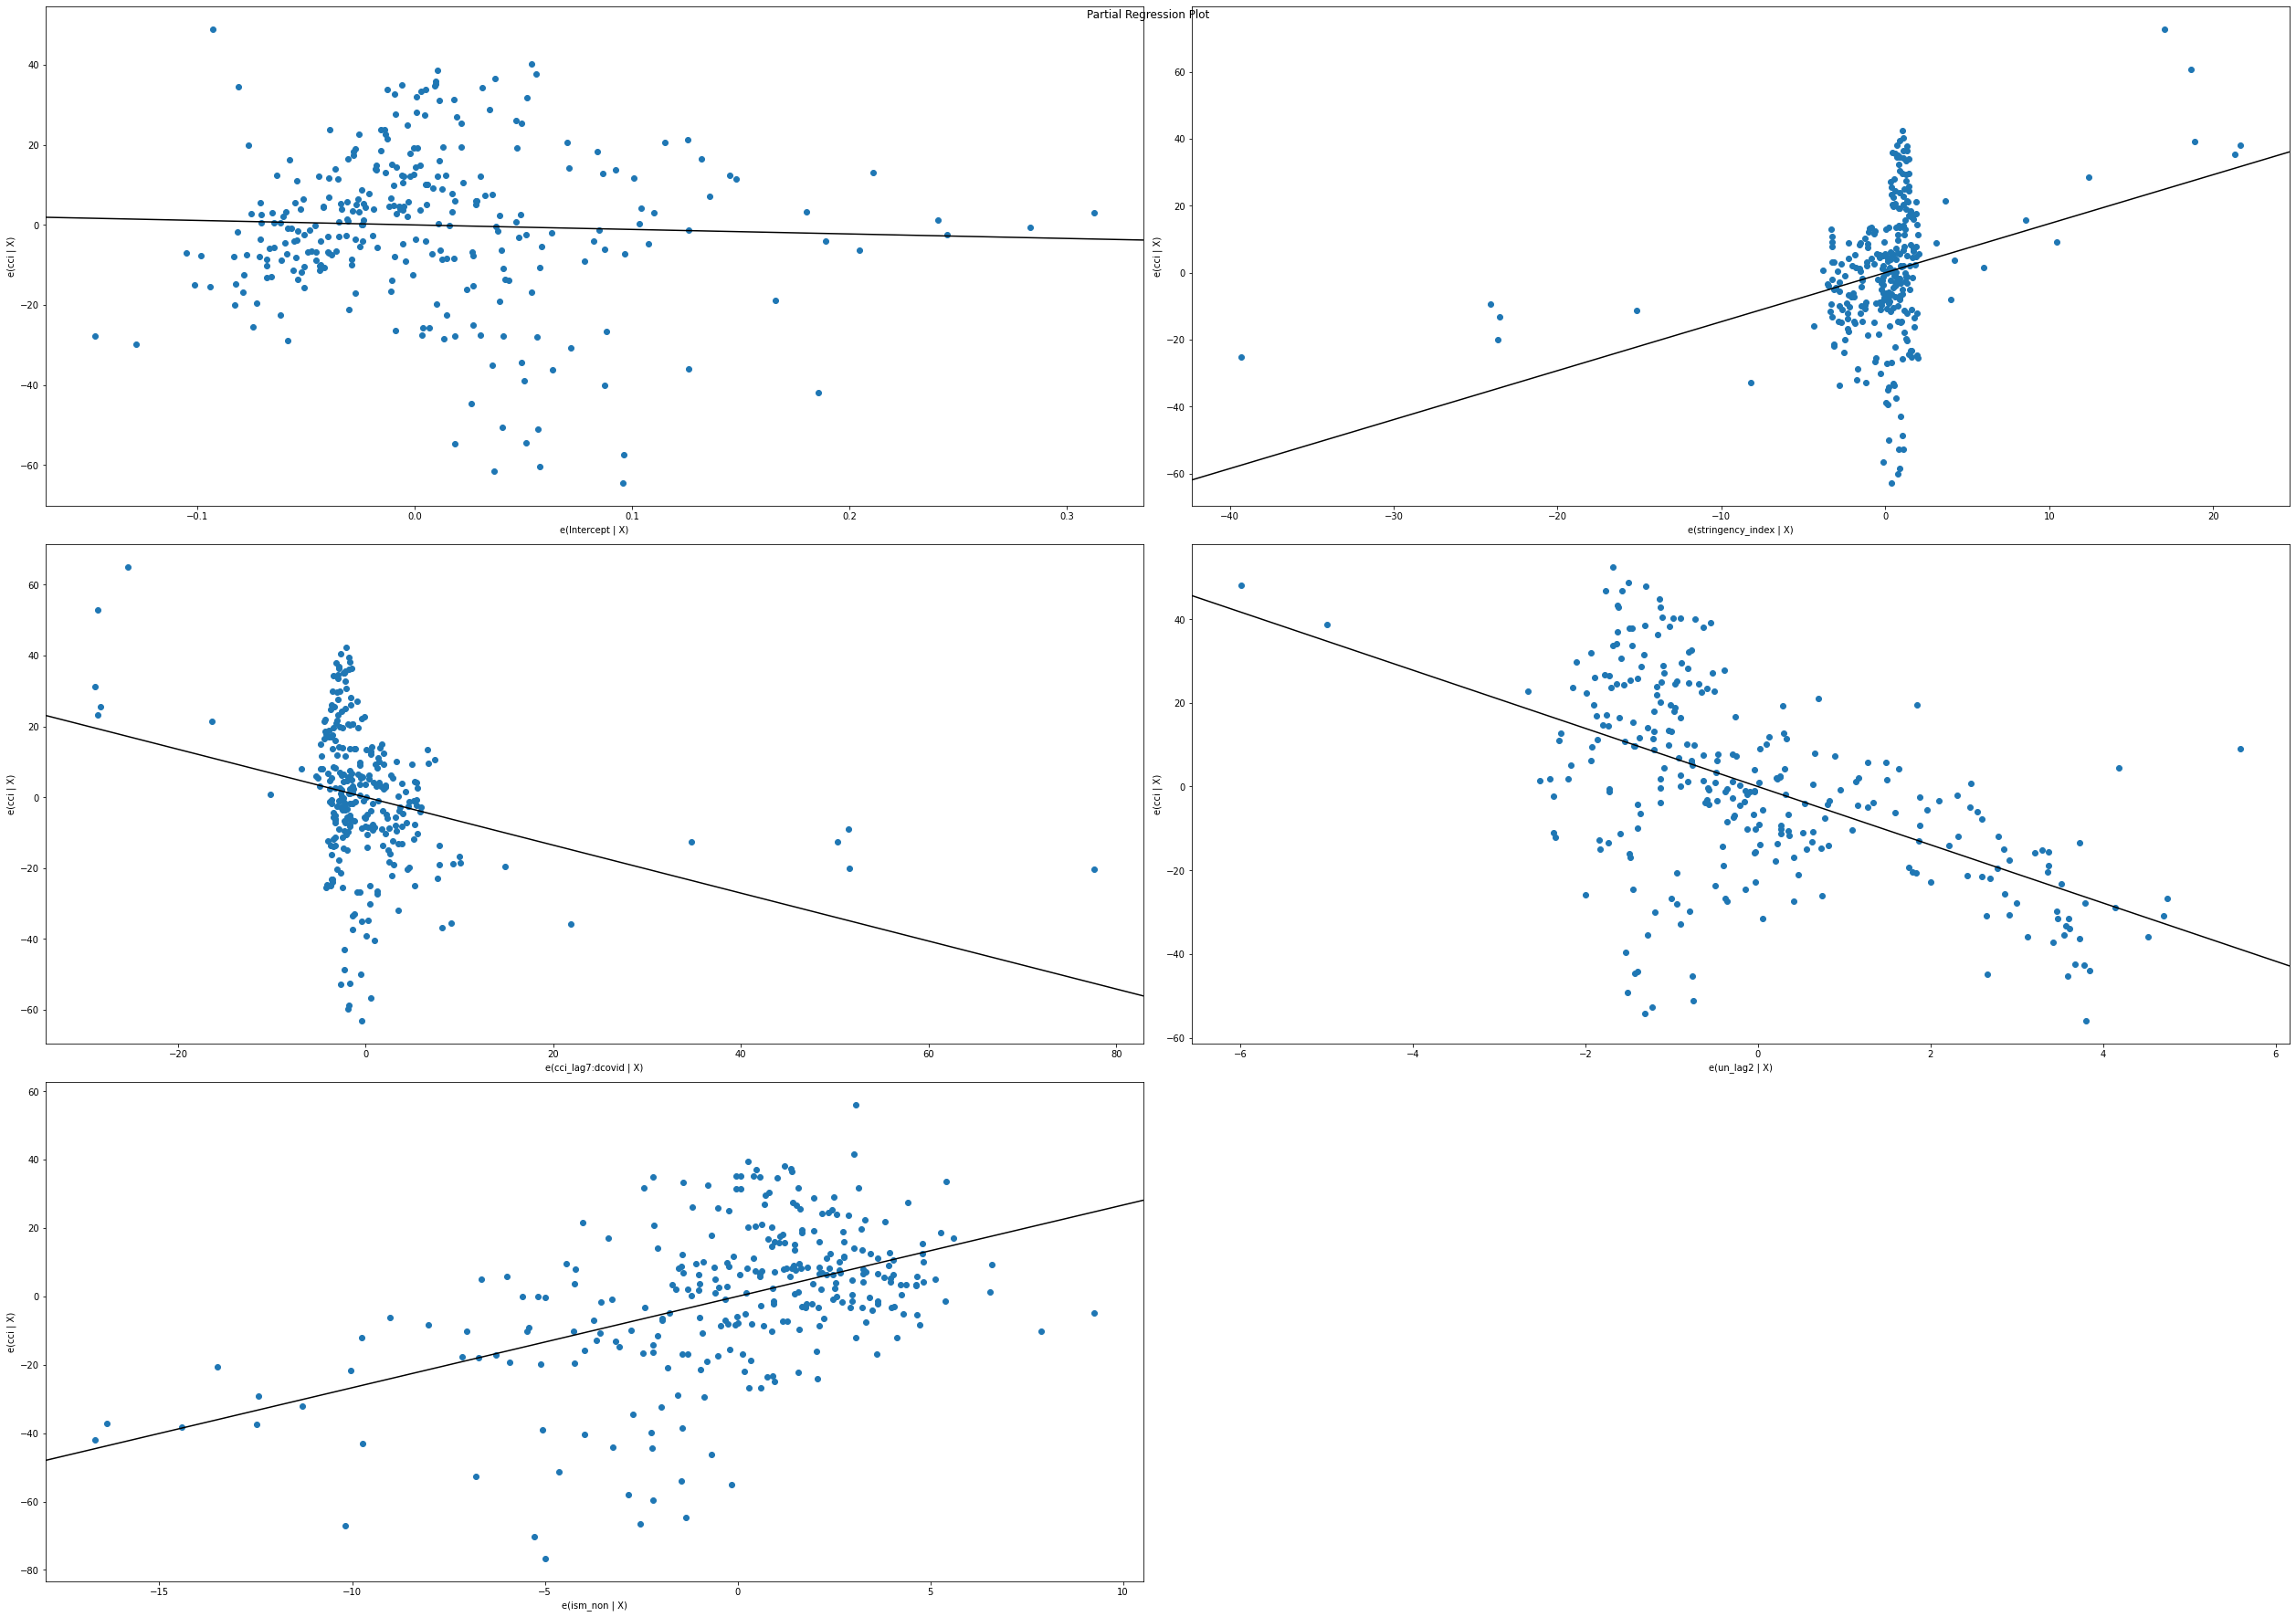

In [176]:
#define figure size
fig = plt.figure(figsize=(35,25))

#produce regression plots
# of y on one predictor variable with different graphs
# fig = sm.graphics.plot_regress_exog(mo, 'cci_lag1', fig=fig)
fig = sm.graphics.plot_partregress_grid(mo, fig=fig)
fig.tight_layout(pad=1.0)

In [79]:
import statsmodels.tools.tools as ct
import statsmodels.stats.diagnostic as smd

In [ ]:
reset = smd.linear_reset(res=mo, power=2, test_type='fitted', use_f=True)
print(reset)

<F test: F=0.019956883350321655, p=0.8877570222469179, df_denom=286, df_num=1>


/Users/mauricefreese/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<AxesSubplot: >

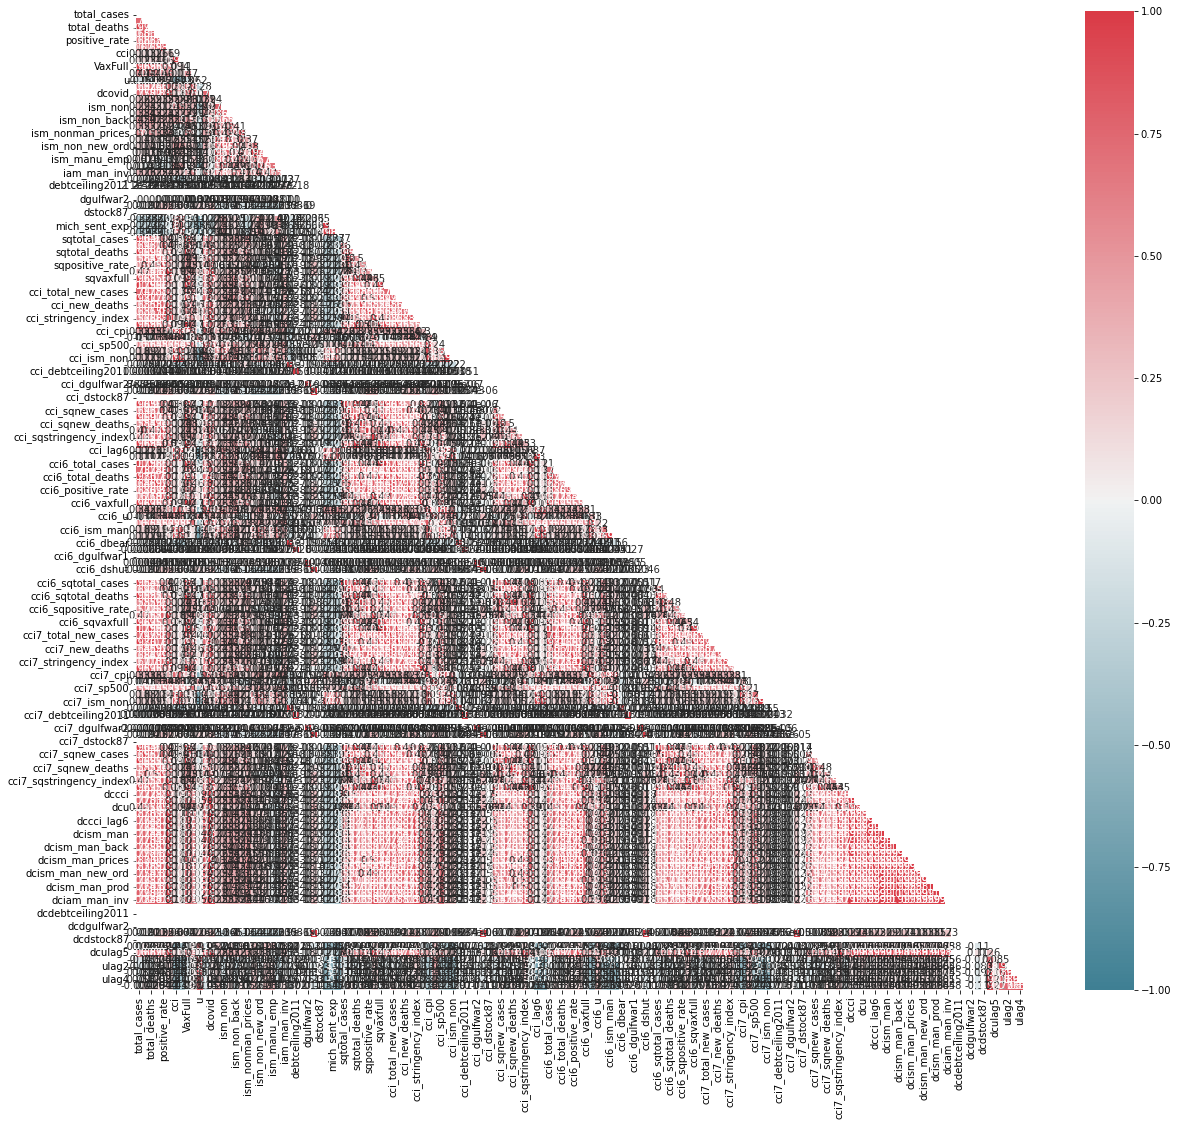

In [21]:
# correlation heat map -- 'red' = 1; dark gray/charcol = -1
import seaborn as sns
corr = df.corr()

f, ax = plt.subplots(figsize=(20, 18))
mask = np.triu(np.ones_like(corr, dtype = bool))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0, ax=ax, annot = True, mask = mask)

In [127]:
pg = df.corr() 
# pg.to_csv('core.csv')
# pg

--------------------------------------------------------------------------------------------------------------------------------------------------------------

/Users/mauricefreese/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


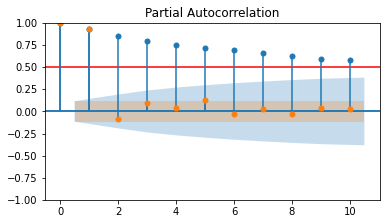

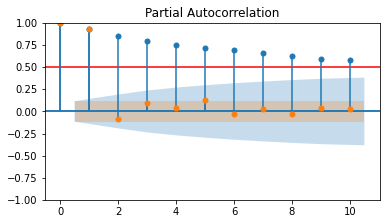

In [19]:
fig, ax = plt.subplots(figsize=(6,3.25))
# if > 0.5 or < -0.5 = high correlation
plt.axhline(y=0.5, color='red')
plot_acf(df['u'], lags=10, ax = ax)
plot_pacf(df['u'], lags=10, ax = ax)

In [21]:
'''
df['ulag1'] = df['u'].shift()
df['ulag2'] = df['ulag1'].shift()
df['ulag3'] = df['ulag2'].shift()
df['ulag4'] = df['ulag3'].shift()
df['ulag6'] = df['ulag5'].shift()

df['mich_over1'] = df['mich_over'].shift()
df['mich_over2'] = df['mich_over1'].shift()
df['mich_over3'] = df['mich_over2'].shift()
df['mich_over4'] = df['mich_over3'].shift()
df['mich_over5'] = df['mich_over4'].shift()
df['mich_over6'] = df['mich_over5'].shift()
'''
df['cpiyoy1'] = df['cpiyoy'].shift().astype('object')
df['cpiyoy2'] = df['cpiyoy1'].shift().astype('object')
df['cpiyoy3'] = df['cpiyoy2'].shift().astype('object')
df['cpiyoy4'] = df['cpiyoy3'].shift().astype('object')
df['cpiyoy5'] = df['cpiyoy4'].shift().astype('object')

df['cci1'] = df['cci'].shift().astype('object')
df['cci2'] = df['cci1'].shift().astype('object')
df['cci3'] = df['cci2'].shift().astype('object')
df['cci4'] = df['cci3'].shift().astype('object')
df['cci5'] = df['cci4'].shift().astype('object')
df['cci6'] = df['cci5'].shift().astype('object')
df['cci7'] = df['cci6'].shift().astype('object')
df['cci8'] = df['cci7'].shift().astype('object')

df = df.dropna(axis=0)

In [22]:
df.shape

(279, 45)

In [ ]:
# From forward selector
x4 = df[['dccci_lag6', 'dbear', 'new_cases', 'ism_nonman_new_ord']]
x4 = sm.add_constant(x4)
y4 = df['cci']
       
# Build the model with RFE features
model4 = sm.OLS(y4,x4).fit()

#Summary of linear model
print(model4.summary2())

In [10]:
df.head() # checking to make sure that lags were correctly inputted

,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,stringency_index,cci,VaxFull,cpi,unem,sp500,dcovid,ism_man,ism_non,ism_man_back,ism_nonman_back,ism_man_prices,ism_nonman_prices,ism_man_new_ord,ism_nonman_new_ord,ism_man_prod,ism_manu_emp,ism_nonman_empl,iam_man_inv,dbear,debtceiling2011,dgulfwar1,dgulfwar2,dshut,dstock87,mich_over,mich_sent_exp,mich_sent_cur,cci_lag1,cci_lag2,cci_lag3,cci_lag4,cci_lag5,cci_lag6,cci_lag7,cci_lag8,un_lag1,un_lag2,un_lag3,un_lag4,un_lag5
833,35612,0.0,0.0,0.0,0.0,0.0,0.0,137.2,0.0,167.2,5.0,891.030029,0,57.7,56.7,56.5,51.0,52.0,50.9,61.3,58.8,64.5,51.7,53.8,45.9,0.0,0.0,0.0,0.0,0.0,0.0,107.1,102.6,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
834,35643,0.0,0.0,0.0,0.0,0.0,0.0,133.1,0.0,167.4,4.8,947.140015,0,56.3,62.0,60.0,49.0,52.1,53.3,60.3,60.2,61.5,51.3,53.8,43.0,0.0,0.0,0.0,0.0,0.0,0.0,104.4,100.3,110.7,137.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
835,35674,0.0,0.0,0.0,0.0,0.0,0.0,126.4,0.0,167.7,4.7,927.580017,0,53.9,56.2,50.0,56.5,53.0,53.1,55.4,59.3,56.6,51.2,53.2,47.2,0.0,0.0,0.0,0.0,0.0,0.0,106.0,100.7,114.1,133.1,137.2,NaN,NaN,NaN,NaN,NaN,NaN,4.8,5.0,NaN,NaN,NaN
836,35704,0.0,0.0,0.0,0.0,0.0,0.0,119.3,0.0,168.1,4.4,955.409973,0,56.4,56.6,56.5,49.5,53.6,53.1,60.9,60.8,59.4,52.8,51.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,105.6,102.8,109.8,126.4,133.1,137.2,NaN,NaN,NaN,NaN,NaN,4.7,4.8,5.0,NaN,NaN
837,35735,0.0,0.0,0.0,0.0,0.0,0.0,126.4,0.0,168.4,4.3,938.989990,0,55.7,58.5,50.0,52.0,52.1,54.3,57.4,59.9,60.1,53.7,56.7,43.8,0.0,0.0,0.0,0.0,0.0,0.0,107.2,102.3,114.9,119.3,126.4,133.1,137.2,NaN,NaN,NaN,NaN,4.4,4.7,4.8,5.0,NaN


In [11]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 841 to 1132
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                292 non-null    int64  
 1   total_cases         292 non-null    float64
 2   new_cases           292 non-null    float64
 3   total_deaths        292 non-null    float64
 4   new_deaths          292 non-null    float64
 5   positive_rate       292 non-null    float64
 6   stringency_index    292 non-null    float64
 7   cci                 292 non-null    float64
 8   VaxFull             292 non-null    float64
 9   cpi                 292 non-null    float64
 10  unem                292 non-null    float64
 11  sp500               292 non-null    float64
 12  dcovid              292 non-null    int64  
 13  ism_man             292 non-null    float64
 14  ism_non             292 non-null    float64
 15  ism_man_back        292 non-null    float64
 16  ism_n

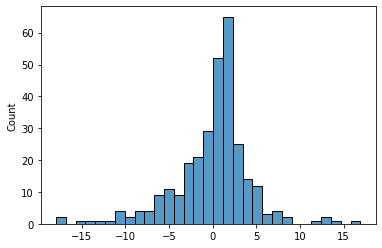

In [291]:
import seaborn as sns
sns.histplot(model4.resid);